In [1]:
import os
os.chdir('/Users/albert/ndreg')

In [2]:
%matplotlib inline

In [3]:
from ndreg import *
import matplotlib
import ndio.remote.neurodata as neurodata

In [4]:
refToken = "ara_ccf2"
refImg = imgDownload(refToken)

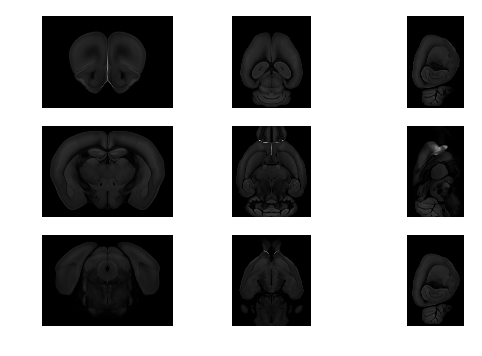

In [5]:
imgShow(refImg)

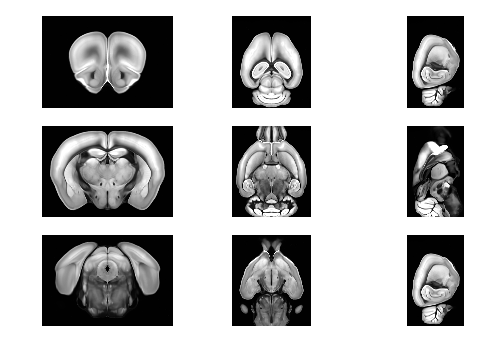

In [6]:
imgShow(refImg, vmax=500)

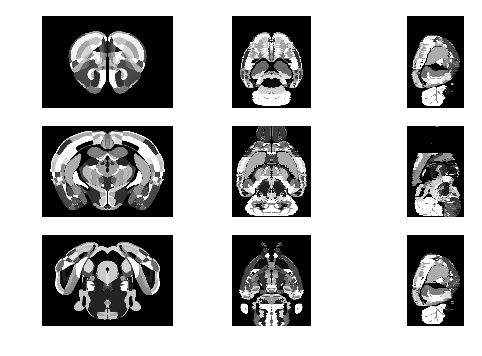

In [7]:
refAnnoImg = imgDownload(refToken, channel="annotation")
imgShow(refAnnoImg, vmax=1000)

In [8]:
randValues = np.random.rand(1000,3)

In [9]:
randValues = np.concatenate(([[0,0,0]],randValues))

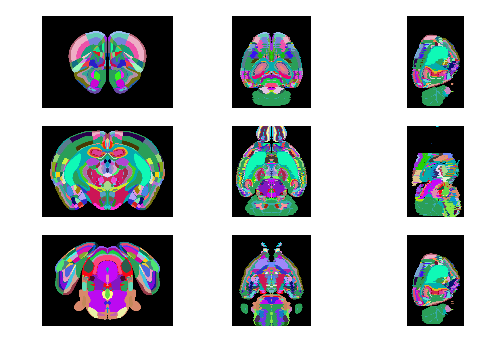

In [10]:
randCmap = matplotlib.colors.ListedColormap (randValues)
imgShow(refAnnoImg, vmax=1000, cmap=randCmap)

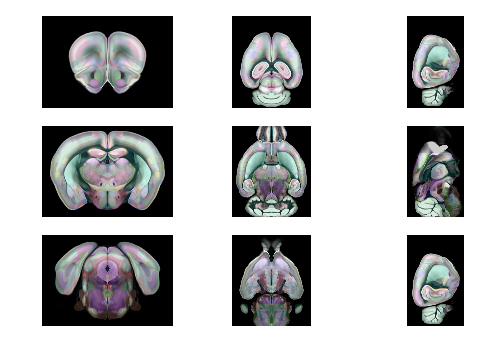

In [11]:
imgShow(refImg, vmax=500, newFig=False)
imgShow(refAnnoImg, vmax=1000, cmap=randCmap, alpha=0.2, newFig=False)
plt.show()

In [12]:
inToken = "Control258"

nd = neurodata()
print(nd.get_metadata(inToken)['dataset']['voxelres'].keys())

[u'1', u'0', u'3', u'2', u'5', u'4']


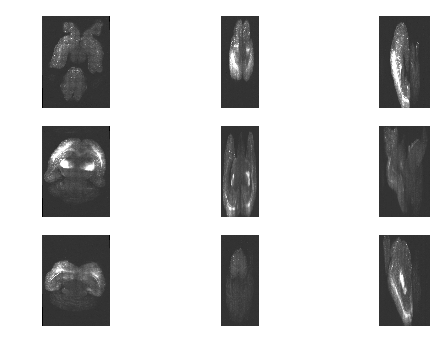

In [13]:
inImg = imgDownload(inToken, resolution=5)
imgShow(inImg, vmax=500)

In [14]:
inImg.SetSpacing([0.01872, 0.01872, 0.005])

In [15]:
print(inImg.GetSpacing())

(0.01872, 0.01872, 0.005)


In [16]:
print(refImg.GetSpacing())

(0.024999999999999998, 0.024999999999999998, 0.024999999999999998)


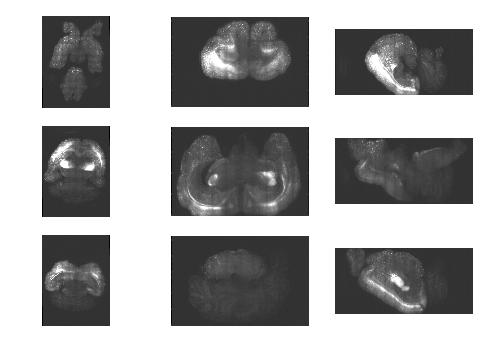

In [17]:
inImg = imgResample(inImg, spacing=refImg.GetSpacing())
imgShow(inImg, vmax=500)

In [1]:
imgShow(refImg, vmax=500)

NameError: name 'imgShow' is not defined

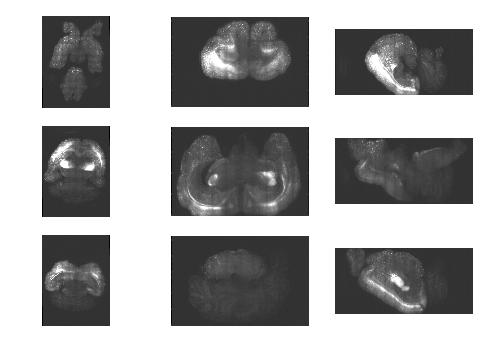

In [19]:
imgShow(inImg, vmax=500)

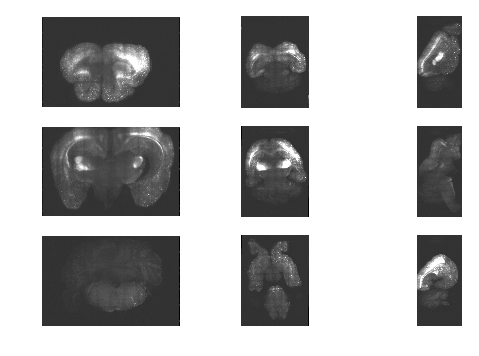

In [20]:
inImg = imgReorient(inImg, "LAI", "RSA")
imgShow(inImg, vmax=500)

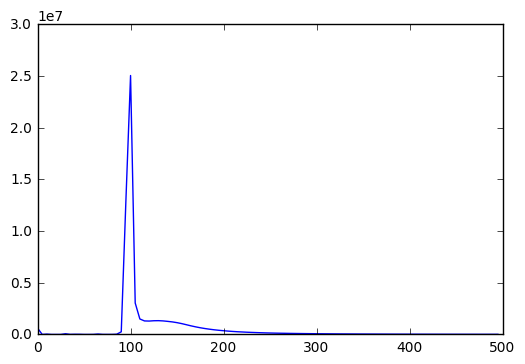

In [21]:
(values, bins) = np.histogram(sitk.GetArrayFromImage(inImg), bins=100, range=(0,500))
plt.plot(bins[:-1], values)

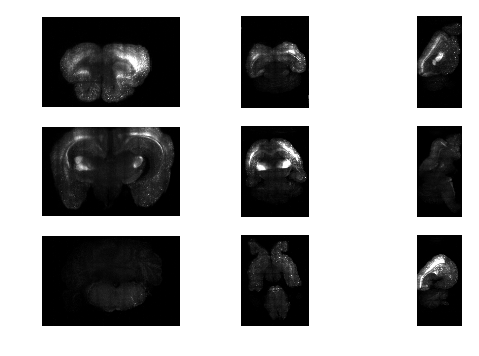

In [22]:
lowerThreshold = 100
upperThreshold = sitk.GetArrayFromImage(inImg).max()+1

inImg = sitk.Threshold(inImg,lowerThreshold,upperThreshold,lowerThreshold) - lowerThreshold
imgShow(inImg, vmax = 500) 

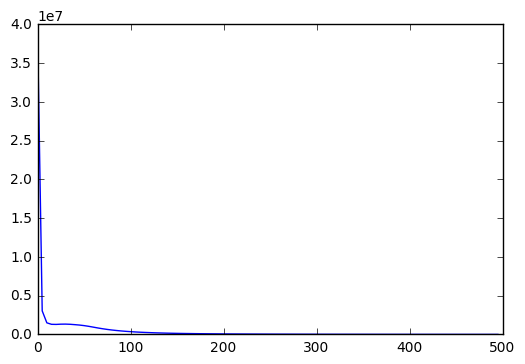

In [23]:
(values, bins) = np.histogram(sitk.GetArrayFromImage(inImg), bins=100, range=(0,500))
plt.plot(bins[:-1], values)

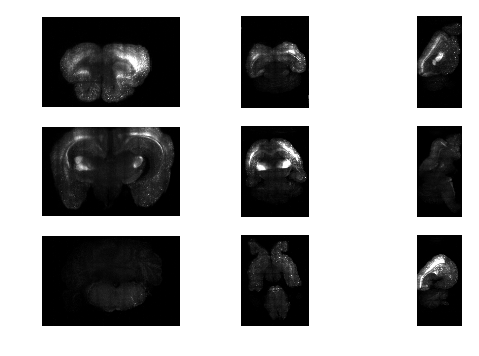

In [24]:
imgShow(inImg, vmax = 500)

In [25]:
(values, bins) = np.histogram(sitk.GetArrayFromImage(inImg), bins=1000)
cumValues = np.cumsum(values).astype(float)
cumValues = (cumValues - cumValues.min()) / cumValues.ptp()

In [26]:
maxIndex = np.argmax(cumValues>0.95)-1
threshold = bins[maxIndex]
print(threshold)

218.813


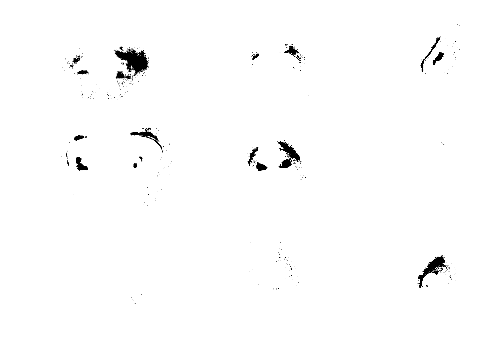

In [27]:
inMask = sitk.BinaryThreshold(inImg, 0, threshold, 1, 0)
imgShow(inMask)

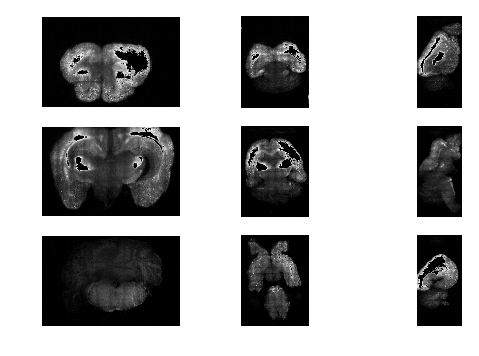

In [28]:
imgShow(imgMask(inImg,inMask))

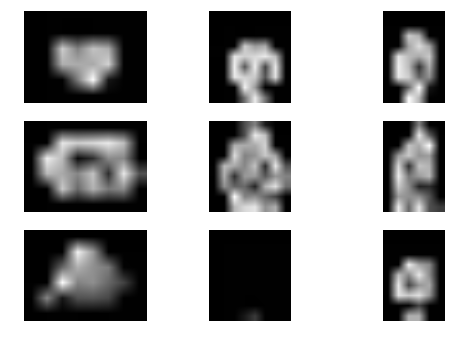

In [29]:
spacing=[1.5,1.5,1.5]
refImg_ds = imgResample(refImg, spacing=spacing)
imgShow(refImg_ds, vmax=500)

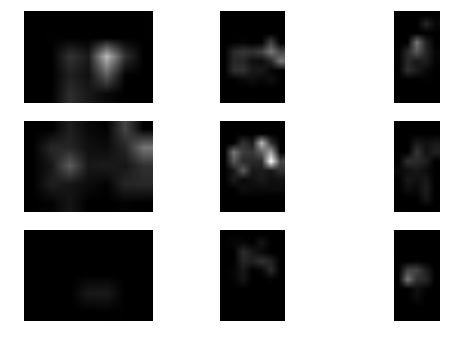

In [30]:
inImg_ds = imgResample(inImg, spacing=spacing)
imgShow(inImg_ds, vmax=500)

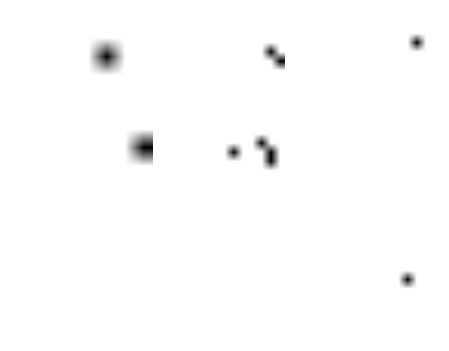

In [31]:
inMask_ds = imgResample(inMask, spacing=spacing, useNearest=True)
imgShow(inMask_ds)

In [32]:
affine = imgAffineComposite(inImg_ds, refImg_ds, inMask=inMask_ds, iterations=100, useMI=True, verbose=True)

Step translation:
0.	 -0.809722743806
1.	 -1.09765899529
2.	 -1.13328817259
3.	 -1.14328036756
4.	 -1.23790260909
5.	 -1.22741911298
6.	 -1.24047426322
7.	 -1.24261636444
8.	 -1.30200226164
9.	 -1.34570865405
10.	 -1.35982943149
11.	 -1.36785682093
12.	 -1.38981945032
13.	 -1.09855827597
14.	 -1.12436667821
15.	 -1.13412091979
16.	 -1.15487336764
17.	 -1.14037206655
18.	 -1.13471587823
19.	 -1.13910916961
20.	 -1.13694423984
21.	 -1.13822873841
22.	 -1.13783232521
23.	 -1.13781331416
24.	 -1.13735049788
25.	 -1.13699638049
26.	 -1.1366425388
27.	 -1.14752677183
28.	 -1.14715403093
29.	 -1.14672416449
30.	 -1.14633244227
31.	 -1.14598445357
32.	 -1.14566813112
33.	 -1.14533734015
34.	 -1.14503149796
35.	 -1.14470562703
36.	 -1.1443844977
37.	 -1.14403342443
38.	 -1.14365747736
39.	 -1.14324612242
40.	 -1.14278583882
41.	 -1.14228697734
42.	 -1.14173191168
43.	 -1.14122097194
Step rigid:
0.	 -1.00820858676
1.	 -1.01817583301
2.	 -1.02930823606
3.	 -1.08906474231
4.	 -1.14900307119
5.	 -1

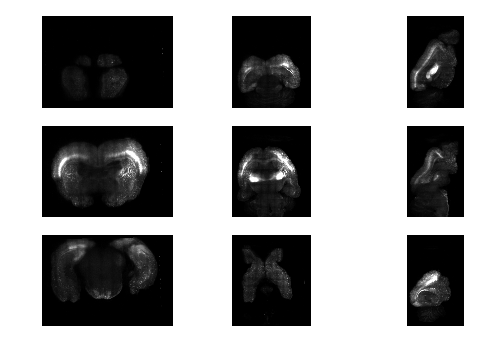

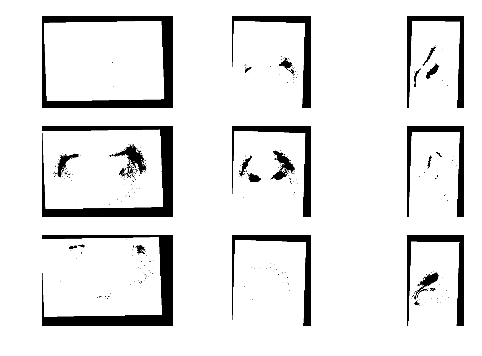

In [33]:
inImg_affine = imgApplyAffine(inImg, affine, size=refImg.GetSize())
imgShow(inImg_affine, vmax=500)

inMask_affine = imgApplyAffine(inMask, affine, size=refImg.GetSize(), useNearest=True)
imgShow(inMask_affine)